## Getting Kaggle Data

In [ ]:
!pip install kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
api.competitions_list(search='titanic')

[titanic]

In [4]:
api.competition_list_files('titanic')

[test.csv, train.csv, gender_submission.csv]

In [6]:
api.competition_download_files('titanic')

In [10]:
from zipfile import ZipFile
zf = ZipFile('titanic.zip')
zf.extractall("data\\") #save files in selected folder
zf.close()

## Small EDA

In [31]:
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("data/train.csv")

In [24]:
df.shape

(891, 12)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

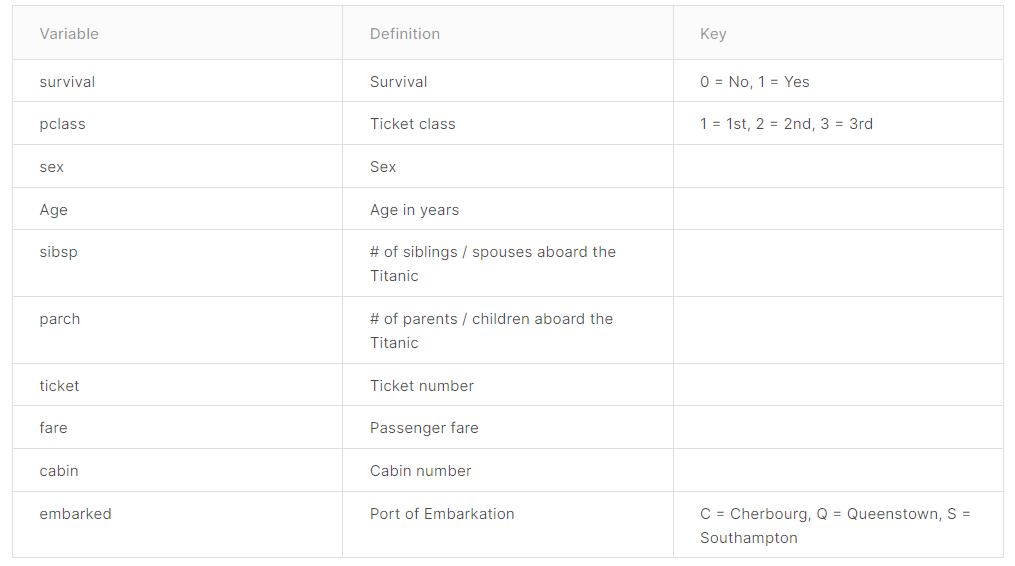

In [29]:
display.Image("titanic table.png")

### Missing values

In [172]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [269]:
print(round(df["Cabin"].isna().sum()/len(df) *100, 1), "% of missing values in Cabin")

77.1 % of missing values in Cabin


<BarContainer object of 3 artists>

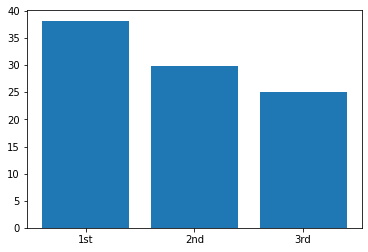

In [242]:
plt.bar(["1st", "2nd", "3rd"], df.groupby("Pclass")["Age"].mean())

In [206]:
## GUESS AGE USING CLASS
age_guess = df.groupby("Pclass")["Age"].mean()[df["Pclass"]].values
df["Age"] = df["Age"].fillna(pd.Series(age_guess)) #.where(df["Age"].isna()

In [219]:
## FILL EMBARKED WITH SOUTHAMPTON
df["Embarked"] = df["Embarked"].fillna("S")

In [220]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

### Distribution analysis

In [361]:
def plot_data(df, column, ax = None):
    if ax == None:
        ax = plt.subplot()
    
    surv = df.loc[df["Survived"] == 1]
    if column == "Survived":
        ax.bar(["Died", "Survived"], df["Survived"].value_counts())
        ax.set_ylabel("Passengers")
    elif column == "Pclass":

        ax.bar(["1st", "2nd", "3rd"], [df["Pclass"].value_counts()[i] for i in range(1,4)], label = "Total")
        ax.bar(["1st", "2nd", "3rd"], [surv["Pclass"].value_counts()[i] for i in range(1,4)], label = "Survived")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Sex":
        ax.bar(df["Sex"].value_counts().keys(), df["Sex"].value_counts().values)
        ax.bar(surv["Sex"].value_counts().keys(), surv["Sex"].value_counts().values, label = "Survived")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Age":
        sns.histplot(df["Age"], bins = 20, color = "C0", label =  "Total", ax=ax)
        sns.histplot(surv["Age"], bins = 20, color = "C1", label = "Survived", ax= ax)
        ax.legend()
        
    elif column == "SibSp":
        ax.bar(df["SibSp"].value_counts().keys(), df["SibSp"].value_counts().values, label = "Total")
        ax.bar(surv["SibSp"].value_counts().keys(), surv["SibSp"].value_counts().values, label = "Survived")
        ax.set_xlabel("SibSP")
        ax.set_ylabel("Passengers")
        ax.legend()
    
    elif column == "Parch":
        ax.bar(df["Parch"].value_counts().keys(), df["Parch"].value_counts().values, label = "Total")
        ax.bar(surv["Parch"].value_counts().keys(), surv["Parch"].value_counts().values, label = "Survived")
        ax.set_xlabel("Parch")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Fare":
    
        sns.histplot(df["Fare"], bins = 20, color = "C0", label =  "Total", ax=ax)
        sns.histplot(surv["Fare"], bins = 20, color = "C1", label = "Survived",  ax=ax)
        ax.legend()
        
    elif column == "Fare/Class":
        ax.bar(["1st", "2nd", "3rd"], df.groupby("Pclass")["Fare"].mean().values)
        ax.set_ylabel("Average cost of ticket")
        ax.set_ylim(0, 85)
        
    elif column == "Embarked": 
        ax.bar(df["Embarked"].value_counts().keys(), df["Embarked"].value_counts().values)
        ax.bar(surv["Embarked"].value_counts().keys(), surv["Embarked"].value_counts().values)
        ax.set_ylabel("Passengers")
    else:
        raise Exception("Column not recognised, try: Survived, Pclass, Sex,Age, SibSp, Parch Fare, Fare/Class, Embarked")

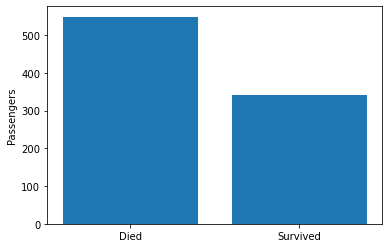

In [342]:
plot_data(df, "Survived")

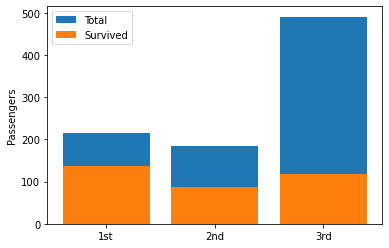

In [343]:
plot_data(df, "Pclass")
# IF YOU WERE IN HIGHER CLASS YOU HAD HIGHER CHANCE TO SURVIVE

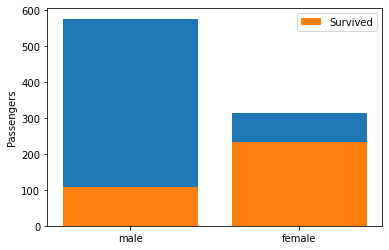

In [344]:
plot_data(df, "Sex")
# IF YOU WERE A WOMAN YOU HAD HIGHER CHANCE TO SURVIVE

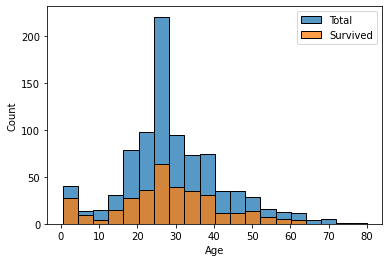

In [345]:
plot_data(df, "Age")
# BABIES SURVIVED A LOT

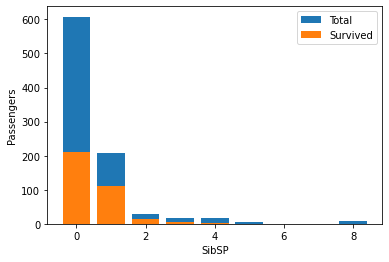

In [346]:
plot_data(df, "SibSp")

# IF YOU HAD A SIBLING LOOKS LIKE MORE LIKELY TO SURVIVE

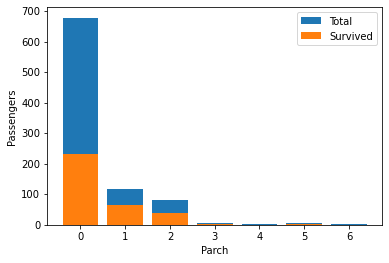

In [347]:
plot_data(df, "Parch")
# IF YOU HAD A SON/DAUGHTER LOOKS LIKE MORE LIKELY TO SURVIVE

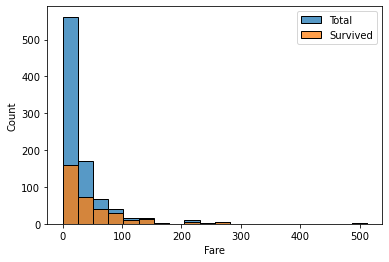

In [348]:
plot_data(df, "Fare")
# MORE YOU PAY MORE YOU SURVIVE?

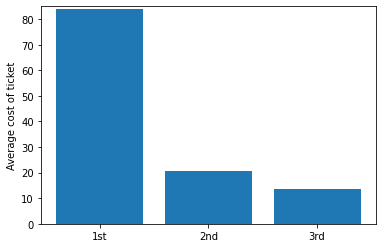

In [362]:
plot_data(df, "Fare/Class")
# PAY MORE FOR HIGHER CLASS 

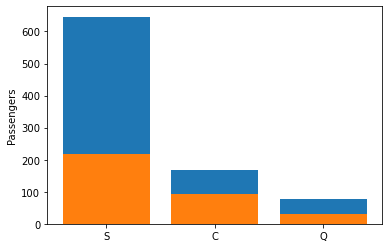

In [350]:
# COULD LOOK AT CLASS PER PORT 
plot_data(df, "Embarked")

## CTGANs

In [351]:
#!pip install ctgan

In [364]:
from ctgan import CTGANSynthesizer

In [365]:
used_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

discrete_columns = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

In [378]:
ctgan = CTGANSynthesizer(epochs=100)

In [379]:
ctgan.fit(df[used_columns], discrete_columns)


C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [380]:
df_synth = ctgan.sample(1000)

In [381]:
df_synth

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,female,-1.563399,0,2,0.378079,S
1,1,3,male,-3.022548,0,0,4.712634,C
2,1,3,male,20.190594,1,0,17.244257,S
3,0,2,male,16.147480,0,2,-3.186990,S
4,0,1,male,7.702708,0,2,2.767405,S
...,...,...,...,...,...,...,...,...
995,0,1,male,20.168918,0,0,0.759425,S
996,1,3,female,19.328958,1,2,7.125577,C
997,1,1,female,11.269195,1,2,2.660105,S
998,1,1,male,12.468917,1,0,131.739338,C


Text(0.5, 1.0, 'Synth')

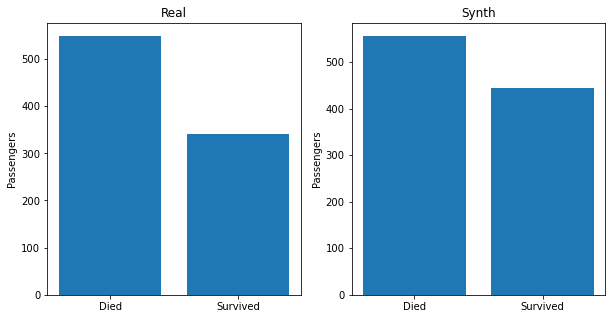

In [382]:
_, ax = plt.subplots(1,2, figsize = (10, 5))
plot_data(df, "Survived", ax[0])
plot_data(df_synth,"Survived", ax[1])
ax[0].set_title("Real")
ax[1].set_title("Synth")

Survived
Pclass
Sex
Age
SibSp
Parch
Fare
Embarked
Fare/Class


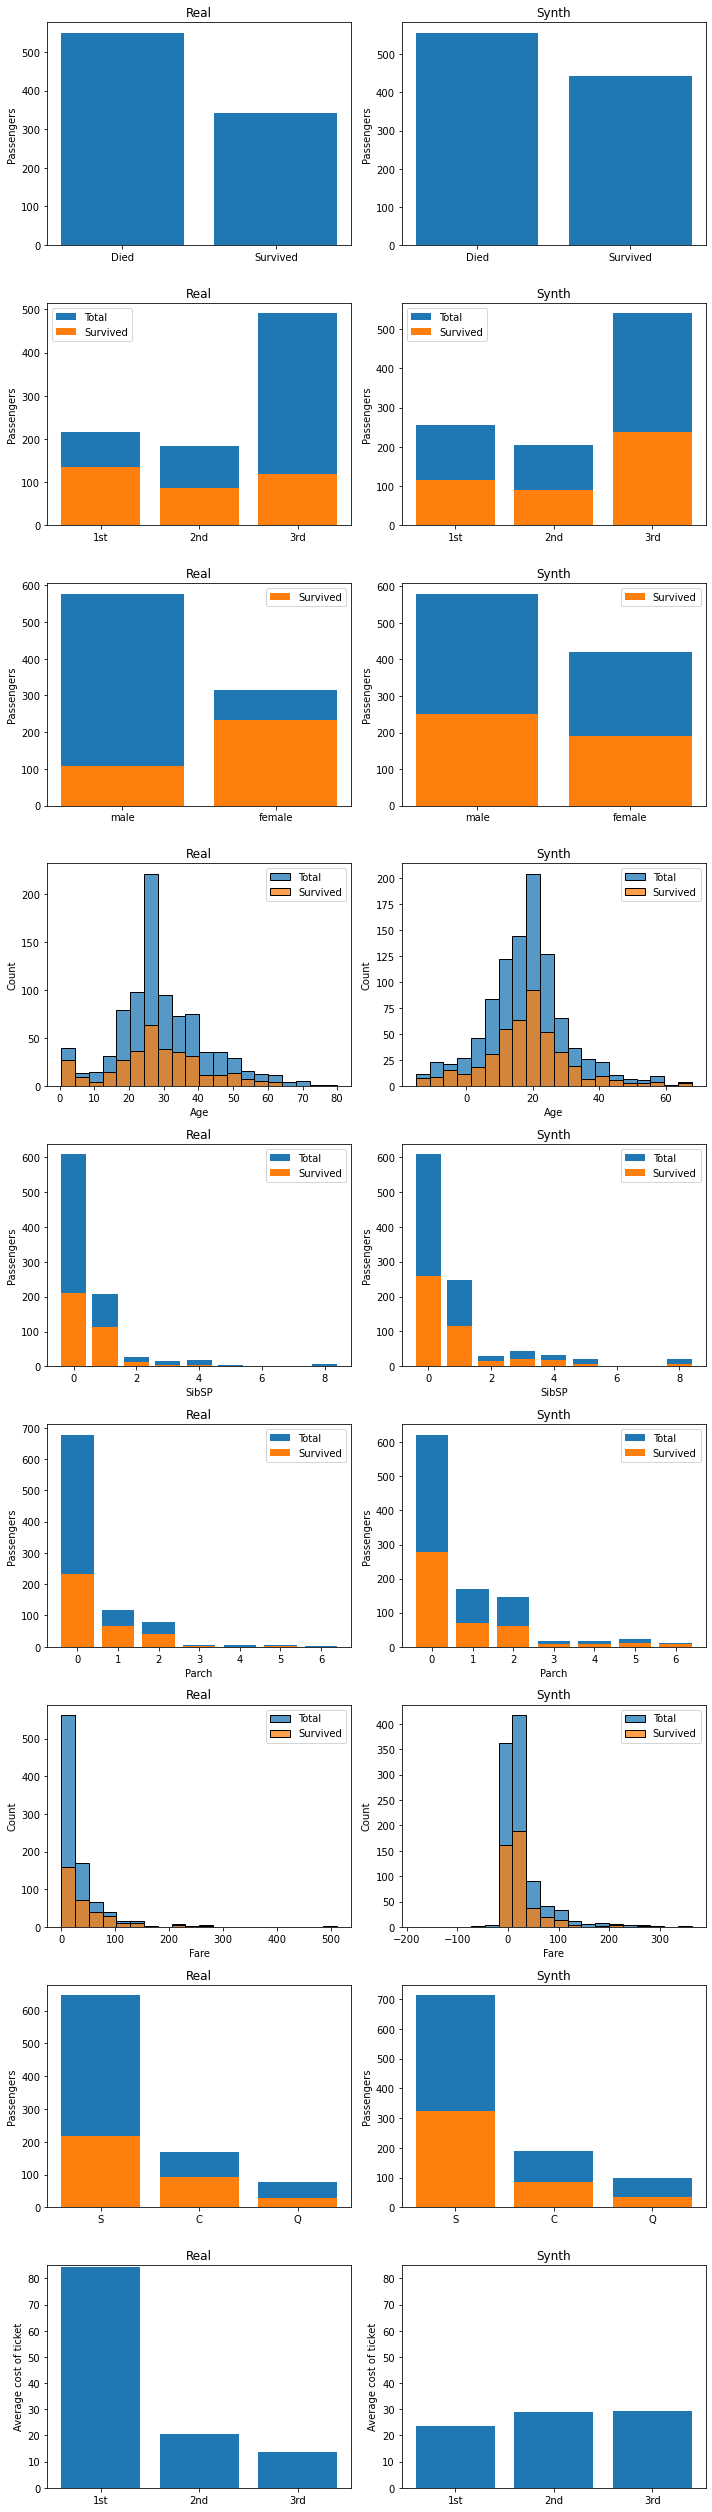

In [383]:
plot_cols =  used_columns + ["Fare/Class"]
fig, ax = plt.subplots(len(plot_cols),2, figsize = (10, 35))

for index, col  in enumerate(plot_cols):
    print(col)
    plot_data(df, col, ax[index][0])
    plot_data(df_synth, col, ax[index][1])

    ax[index][0].set_title("Real")
    ax[index][1].set_title("Synth")
fig.tight_layout()